In [109]:
import math
u0 = 0.009
def PWM(u):
    z=0;
    if(u>0):
        z=1
    else:
        z=-1
    u=z*u
    if(u<u0):
        return 0
    elif(u0<u and u<=(1.5*u0)):
        return z*40
    elif((1.5*u0)<u and u<=(2.0*u0)):
        return z*80
    elif((2.0*u0)<u and u<=(2.5*u0)):
        return z*120
    elif((2.5*u0)<u and u<=(3.0*u0)):
        return z*160
    else:
        return z*200
        

t, tau, wx, wy, wz, R0, R1, R2, R3, P0, P1, P2, P3, Q0, Q1, Q2, Q3, u1, u2, u3, q = (0 for _ in range(21))
h=0.2
R0=math.cos(3.14/4)
R3=math.sin(3.14/4)
wz=0

wz_list = [wz]
t_list = [0]
R3_list = [0]

while t<100:
    #кватернион рассогласования за h
    P1 = wx*h*0.5
    P2 = wy*h*0.5
    P3 = wz*h*0.5
    
    SP = P1*P1 + P2*P2 + P3*P3
    SR = R0*R0 + R1*R1 + R2*R2 + R3*R3
    
    P0 = (3 - SP - SR)*0.5
    
    #кватернион в t+h
    Q0=R0*P0 - R1*P1 - R2*P2 - R3*P3
    Q1=R0*P1 + R1*P0 + R2*P3 - R3*P2
    Q2=R0*P2 + R2*P0 + R3*P1 - R1*P3
    Q3=R0*P3 + R3*P0 + R1*P2 - R2*P1
    
    
    u1 = -(2*(Q0*Q1) + 7*wx)
    u2 = -(2*(Q0*Q2) + 7*wy)
    u3 = -(2*(Q0*Q3) + 7*wz)
    
    if(abs(wz)<0.1):
        u3=-1
    else:
        u3=0
    if(R3<math.sin(3.14/8)):
        u3 = -(2*(Q0*Q3) + 7*wz)
        
    R0=Q0
    R1=Q1
    R2=Q2
    R3=Q3   
    
#obs      
    wx = 0.011 * 0.001 * PWM(u1) + wx #1KHz obs
    wy = 0.011 * 0.001 * PWM(u2) + wy
    wz = 0.011 * 0.001 * PWM(u3) + wz

    
    t=t+h #5Hz object
    
#graphs   
    wz_list.append(wz)
    R3_list.append(2*Q0*Q3)
    t=t+h
    t_list.append(t)

In [110]:
import matplotlib.pyplot as pp
%matplotlib inline

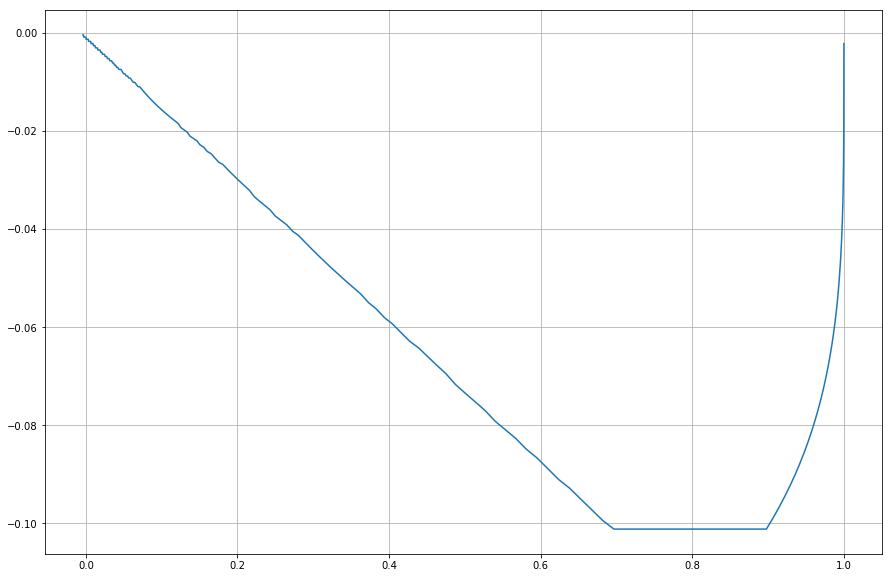

In [111]:
fig, ax = pp.subplots(figsize=(15,10))

ax.plot(R3_list[1:], wz_list[1:])
ax.grid(True)

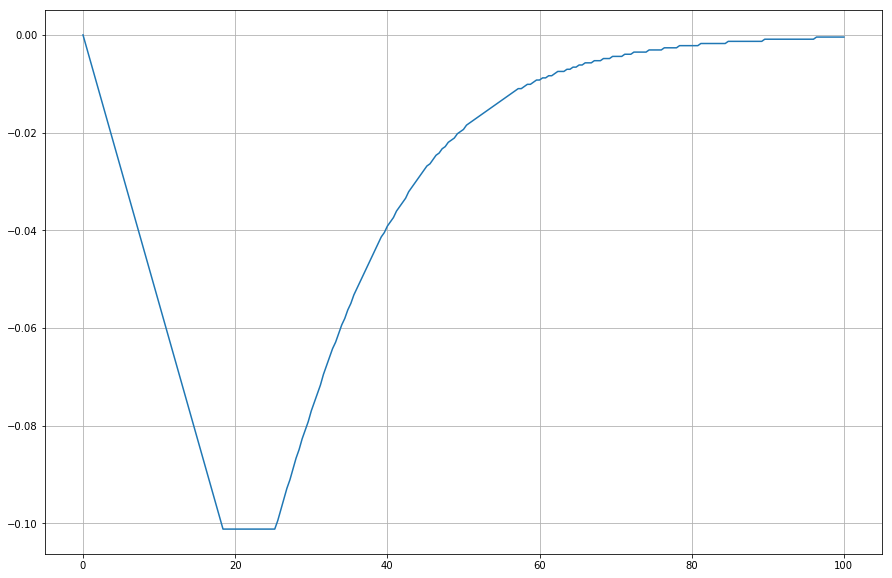

In [112]:
fig, ax = pp.subplots(figsize=(15,10))

ax.plot(t_list, wz_list)
ax.grid(True)